# Employee Attrition Prediction using ML

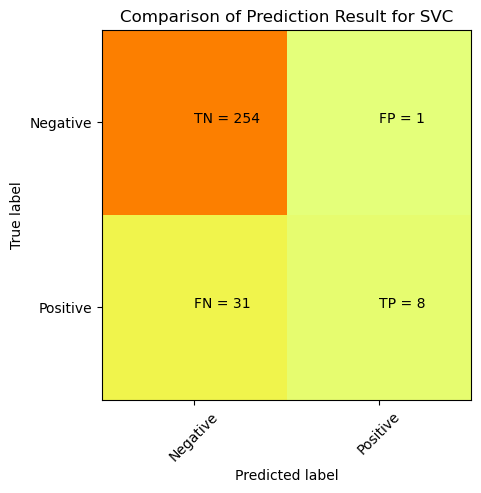

Accuracy of the Model SVC 89.1%


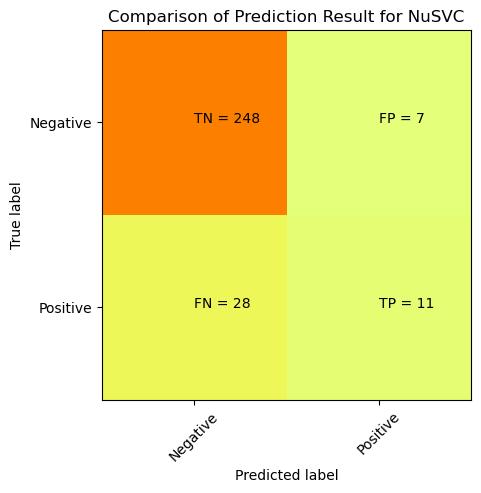

Accuracy of the Model NuSVC 88.1%


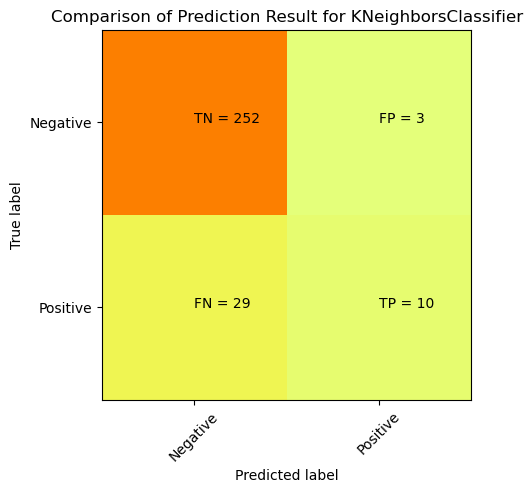

Accuracy of the Model KNeighborsClassifier 89.1%


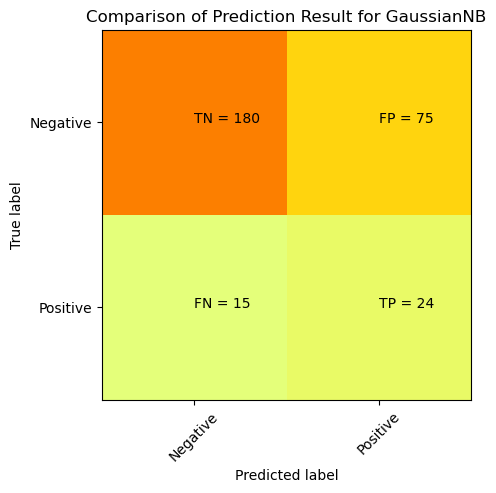

Accuracy of the Model GaussianNB 69.4%


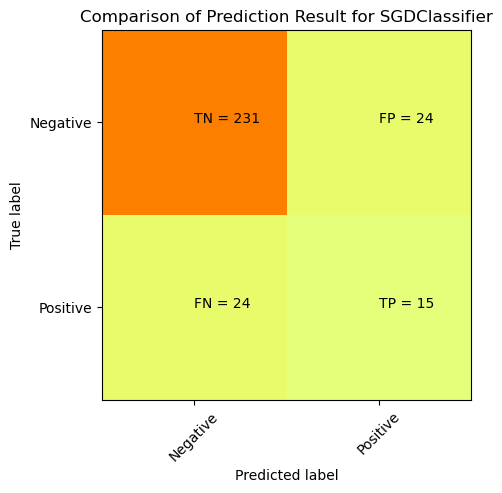

Accuracy of the Model SGDClassifier 83.7%


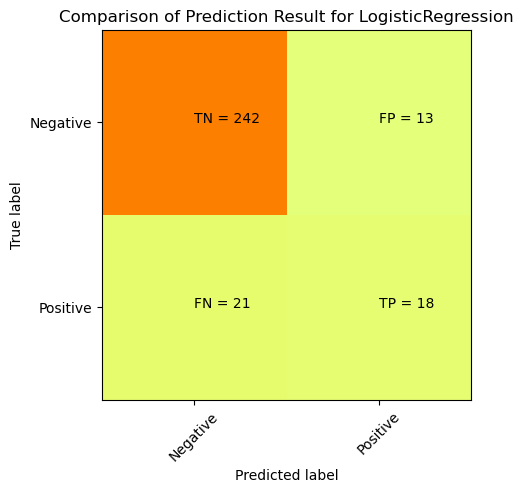

Accuracy of the Model LogisticRegression 88.4%


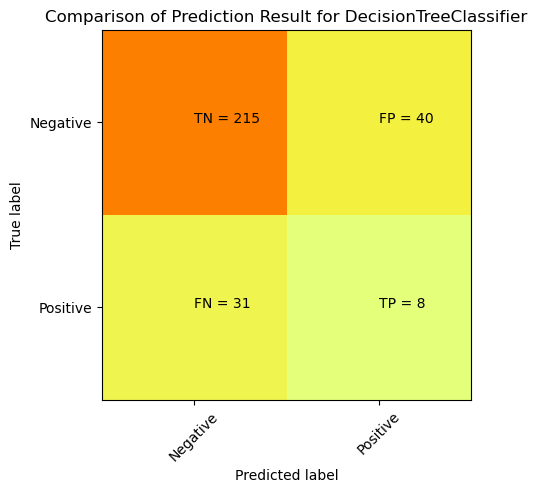

Accuracy of the Model DecisionTreeClassifier 75.9%


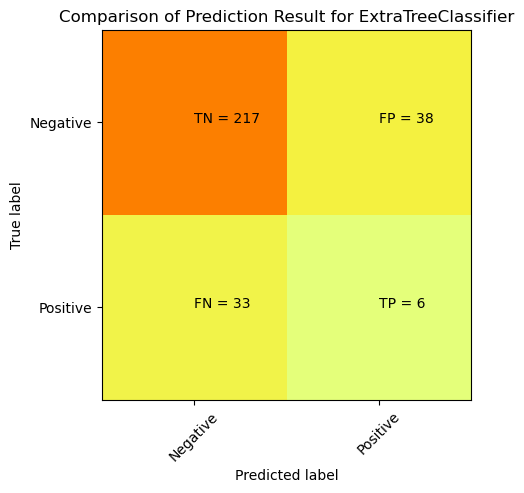

Accuracy of the Model ExtraTreeClassifier 75.9%


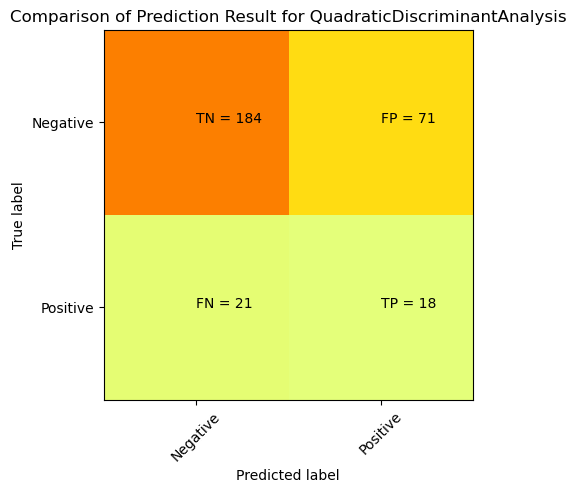

Accuracy of the Model QuadraticDiscriminantAnalysis 68.7%


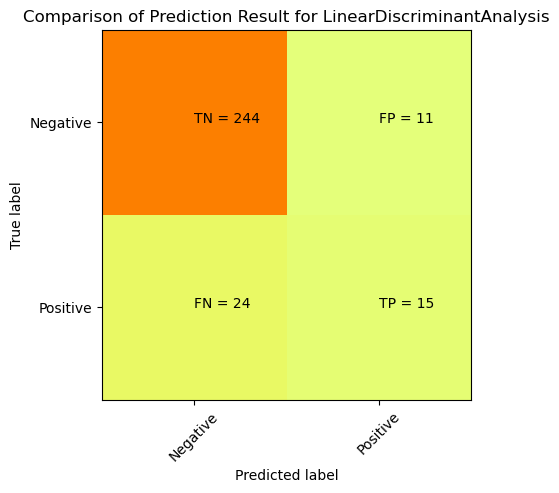

Accuracy of the Model LinearDiscriminantAnalysis 88.1%


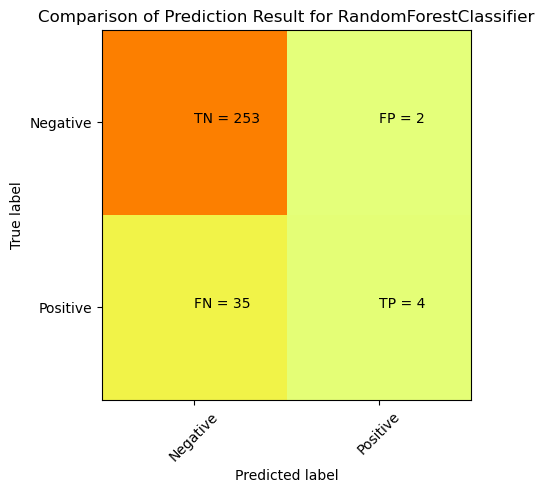

Accuracy of the Model RandomForestClassifier 87.4%


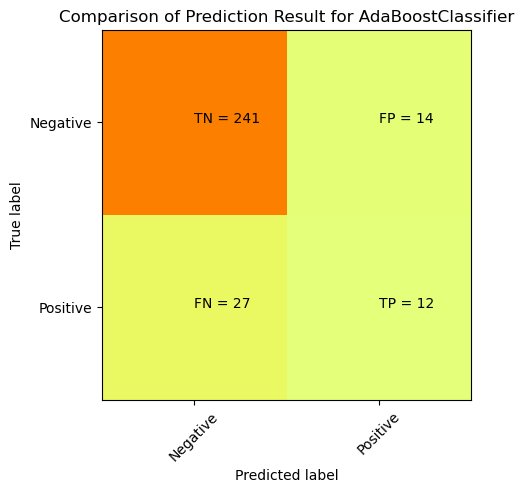

Accuracy of the Model AdaBoostClassifier 86.1%


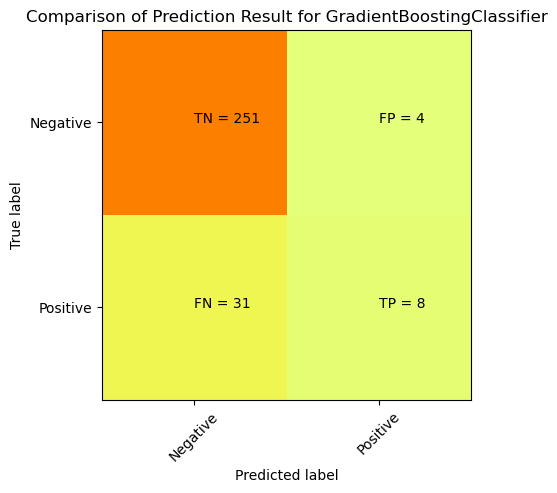

Accuracy of the Model GradientBoostingClassifier 88.1%


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings

warnings.filterwarnings('ignore')

def load_data(filepath):
    data = pd.read_csv(filepath)
    data = data.drop(['EmployeeCount','Over18'], axis = 1)
    data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
    data = pd.get_dummies(data)
    X = data.drop(['Attrition'], axis=1)
    y = data['Attrition']
    X = StandardScaler().fit_transform(X)
    return X, y

def train_test_ml_model(X_train, y_train, X_test, y_test, model, model_name):
    model.fit(X_train, y_train) # Train the Model
    y_pred = model.predict(X_test) # Use the Model for prediction
    # Test the Model
    cm = confusion_matrix(y_test, y_pred)
    accuracy = round(100 * np.trace(cm) / np.sum(cm), 1)
    # Plot/Display the results
    cm_plot(cm, model_name)
    print('Accuracy of the Model', model_name, str(accuracy) + '%')

def cm_plot(cm, model_name):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Comparison of Prediction Result for ' + model_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

def main():
    X, y = load_data("C:\\Users\\nkart\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "SVC": SVC(),
        "NuSVC": NuSVC(nu=0.285),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GaussianNB": GaussianNB(),
        "SGDClassifier": SGDClassifier(),
        "LogisticRegression": LogisticRegression(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "ExtraTreeClassifier": ExtraTreeClassifier(),
        "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
        "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        train_test_ml_model(X_train, y_train, X_test, y_test, model, model_name)

if __name__ == "__main__":
    main()
